## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
data = pd.read_csv("telecom_users.csv")

## Exploratory Data Analysis

In [3]:
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [5]:
data.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
Unnamed: 0,5986.0,3533.561310,2035.705666,0.00,709.50,1777.25,3546.5,5291.75,6354.500,6975.15,7042.00
SeniorCitizen,5986.0,0.161377,0.367909,0.00,0.00,0.00,0.0,0.00,1.000,1.00,1.00
tenure,5986.0,32.468760,24.516391,0.00,2.00,9.00,29.0,56.00,69.000,72.00,72.00
MonthlyCharges,5986.0,64.802213,30.114702,18.25,20.05,35.65,70.4,89.90,102.825,114.90,118.75


In [6]:
data.shape

(5986, 22)

In [7]:
data.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
## TotalCharges columns has numeric values but looks object type
data[data["TotalCharges"] == " "]

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
634,1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2771,3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3086,5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3255,3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
4326,936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
5375,753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5382,4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5695,488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
5951,1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No


In [9]:
data["TotalCharges"] = data["TotalCharges"].replace(" ", np.nan)

In [10]:
data["TotalCharges"].isnull().sum()

10

In [11]:
## Convert numeric
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"])

In [12]:
data["TotalCharges"].dtypes

dtype('float64')

In [13]:
data.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
Unnamed: 0,5986.0,3533.561310,2035.705666,0.00,709.500,1777.2500,3546.50,5291.7500,6354.500,6975.150,7042.00
SeniorCitizen,5986.0,0.161377,0.367909,0.00,0.000,0.0000,0.00,0.0000,1.000,1.000,1.00
tenure,5986.0,32.468760,24.516391,0.00,2.000,9.0000,29.00,56.0000,69.000,72.000,72.00
MonthlyCharges,5986.0,64.802213,30.114702,18.25,20.050,35.6500,70.40,89.9000,102.825,114.900,118.75
TotalCharges,5976.0,2298.060617,2274.127165,18.80,84.825,404.3125,1412.15,3846.9625,6008.150,8058.625,8684.80


In [14]:
#Drop null values
data.dropna(inplace = True)

## Variable Analysis

In [15]:
data['Churn'] = data['Churn'].map({'Yes' : 1, 'No' : 0})

In [16]:
def corr_for_target(data, target, title=None):
    plt.figure(figsize=(4,14))
    sns.set(font_scale=1)
    
    sns.heatmap(data.corr()[[target]].sort_values(target, ascending=False)[1:], annot=True, cmap="coolwarm")
    
    if title: plt.title(f"\n{title}\n", fontsize=18)
    return

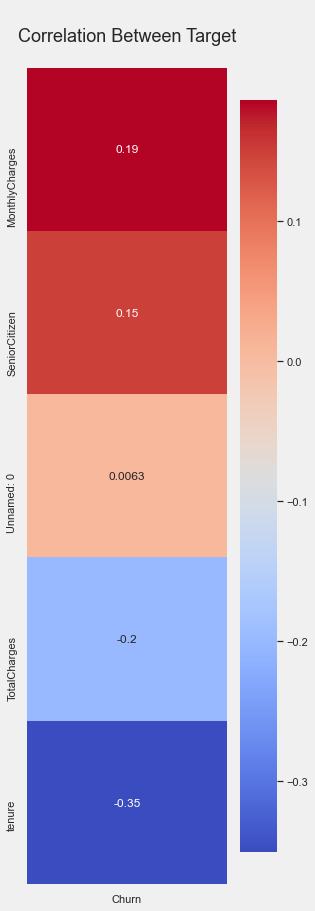

In [17]:
corr_for_target(data, 'Churn', 'Correlation Between Target')

In [18]:
def categorical(columns):
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    plt.pie(x = data[columns].value_counts(), labels = data[columns].value_counts().index, autopct="%.1f%%", pctdistance =0.7)
    plt.subplot(1, 2, 2)
    sns.countplot(x = columns, data = data, hue = "Churn")
    plt.show()
    print(data[columns].value_counts())

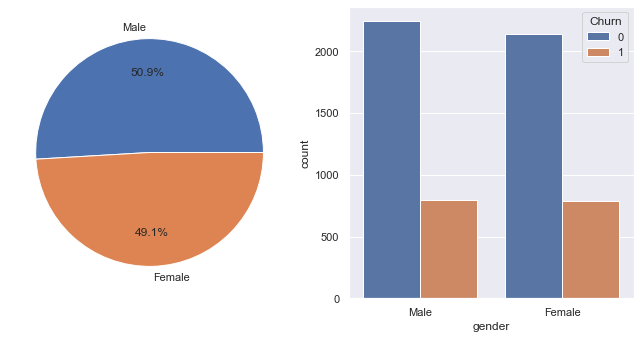

Male      3044
Female    2932
Name: gender, dtype: int64


In [19]:
categorical("gender")

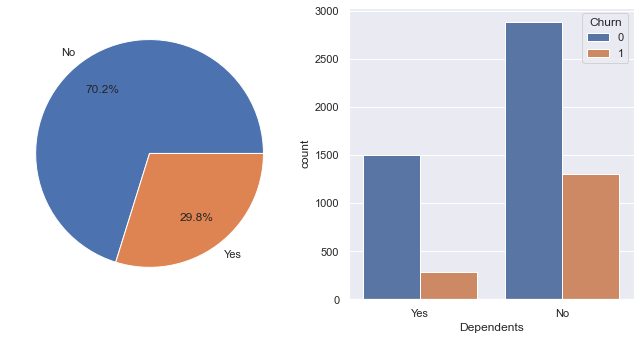

No     4195
Yes    1781
Name: Dependents, dtype: int64


In [20]:
categorical("Dependents")

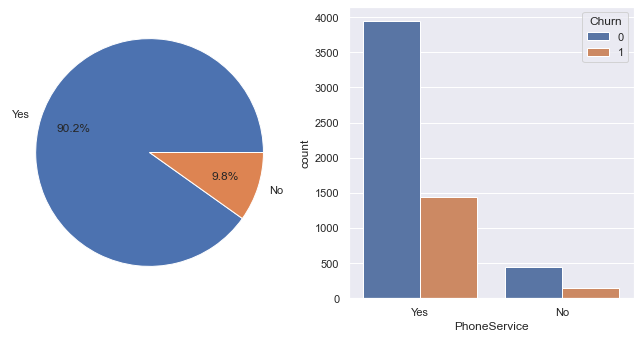

Yes    5388
No      588
Name: PhoneService, dtype: int64


In [21]:
categorical("PhoneService")

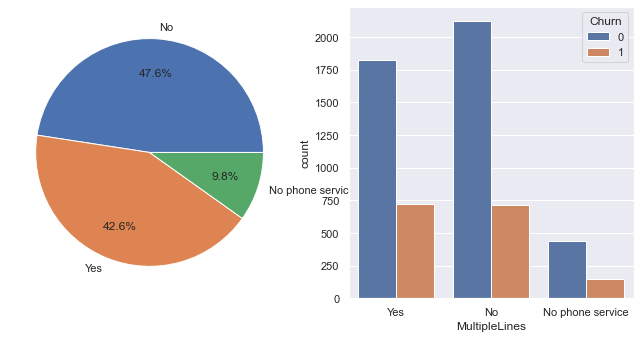

No                  2843
Yes                 2545
No phone service     588
Name: MultipleLines, dtype: int64


In [22]:
categorical("MultipleLines")

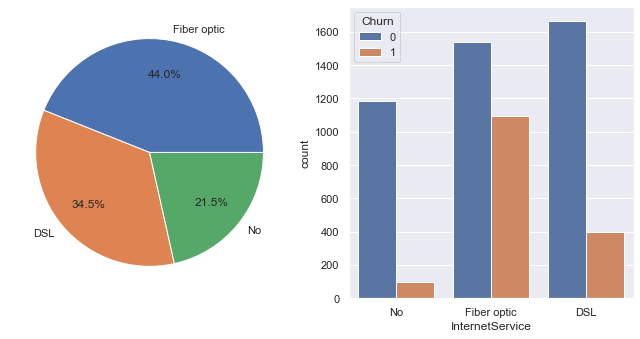

Fiber optic    2627
DSL            2064
No             1285
Name: InternetService, dtype: int64


In [23]:
categorical("InternetService")

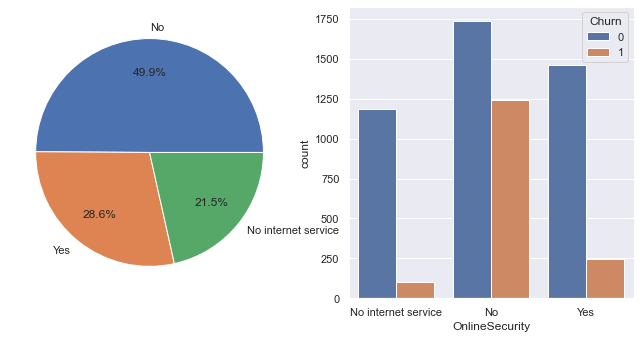

No                     2982
Yes                    1709
No internet service    1285
Name: OnlineSecurity, dtype: int64


In [24]:
categorical("OnlineSecurity")

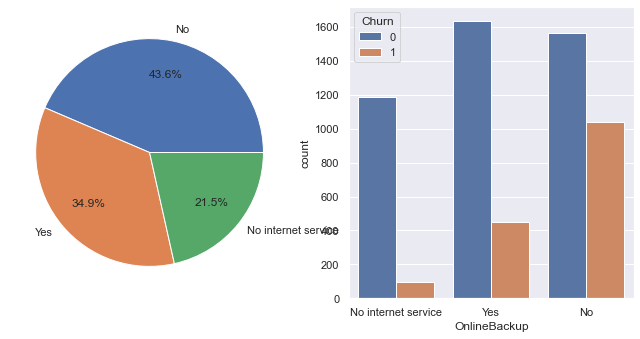

No                     2604
Yes                    2087
No internet service    1285
Name: OnlineBackup, dtype: int64


In [25]:
categorical("OnlineBackup")

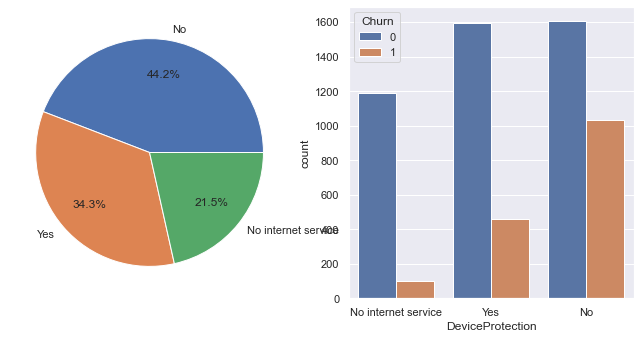

No                     2639
Yes                    2052
No internet service    1285
Name: DeviceProtection, dtype: int64


In [26]:
categorical("DeviceProtection")

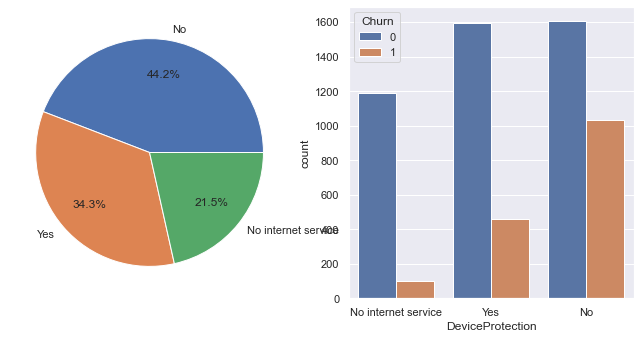

No                     2639
Yes                    2052
No internet service    1285
Name: DeviceProtection, dtype: int64


In [27]:
categorical("DeviceProtection")

In [28]:
def numeric(columns, discrete = False):
    if discrete:
        plt.figure(figsize = (7,5))
        sns.countplot(x = columns, data = data, hue = "Churn")
        plt.show()
    else:
        plt.figure(figsize = (15,7))
        sns.jointplot(x = columns, y = "Churn", data = data, kind = "reg")

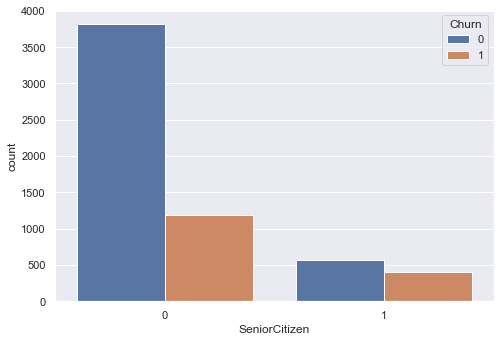

In [29]:
numeric("SeniorCitizen", True)

<Figure size 1080x504 with 0 Axes>

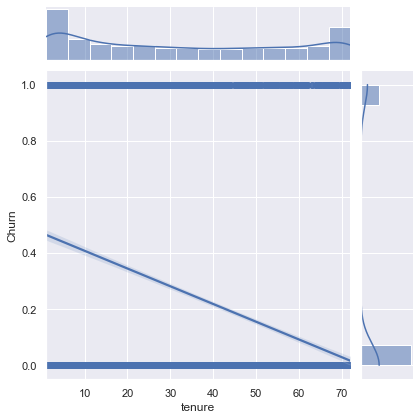

In [30]:
numeric("tenure")

Bir kişinin şirkette kaldığı ay sayısı arttıkça ayrılma durumu azalır.

<Figure size 1080x504 with 0 Axes>

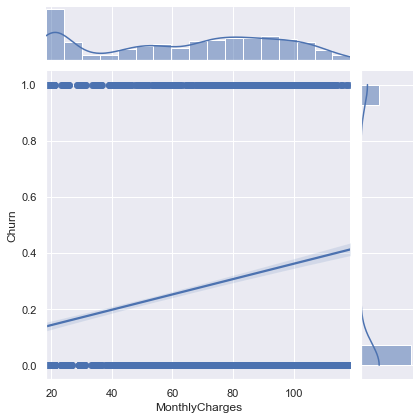

In [31]:
numeric("MonthlyCharges")

Müşteriden aylık olarak tahsil edilen tutar arttıkça ayrılma durumu artar

<Figure size 1080x504 with 0 Axes>

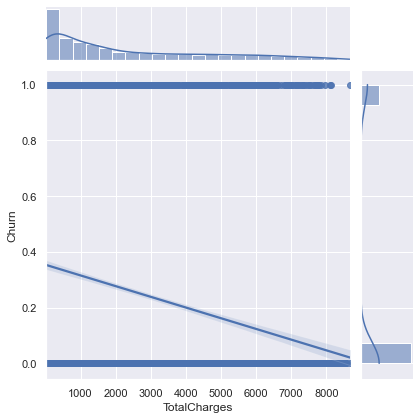

In [32]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
numeric("TotalCharges")

Müşteriden tahsil edilen toplam tutar arttıkça churn azalır.

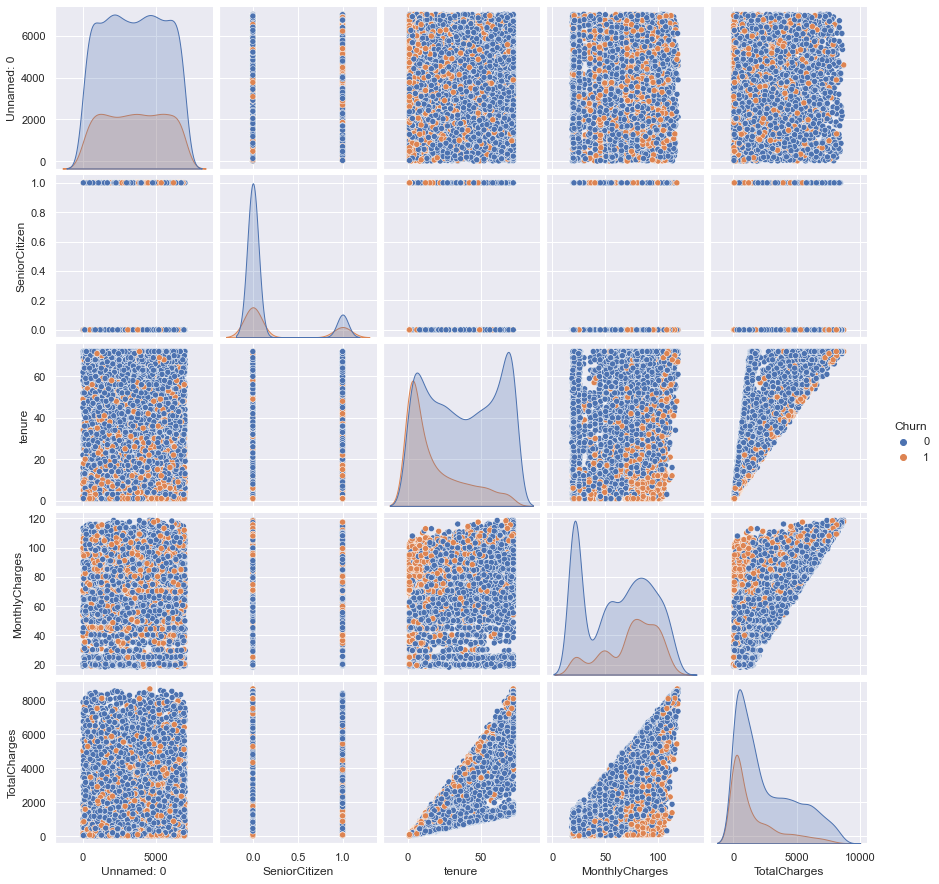

In [33]:
sns.pairplot(data, hue = "Churn")

## Feature Engineering

In [34]:
categorical_val = data.select_dtypes(["object"])
for i in categorical_val.columns:
    print(i)
    print(data[i].value_counts())
    print("------------------")

customerID
0319-QZTCO    1
6061-GWWAV    1
2208-UGTGR    1
2533-TIBIX    1
8853-TZDGH    1
             ..
0004-TLHLJ    1
7072-MBHEV    1
7190-XHTWJ    1
0021-IKXGC    1
8317-BVKSO    1
Name: customerID, Length: 5976, dtype: int64
------------------
gender
Male      3044
Female    2932
Name: gender, dtype: int64
------------------
Partner
No     3080
Yes    2896
Name: Partner, dtype: int64
------------------
Dependents
No     4195
Yes    1781
Name: Dependents, dtype: int64
------------------
PhoneService
Yes    5388
No      588
Name: PhoneService, dtype: int64
------------------
MultipleLines
No                  2843
Yes                 2545
No phone service     588
Name: MultipleLines, dtype: int64
------------------
InternetService
Fiber optic    2627
DSL            2064
No             1285
Name: InternetService, dtype: int64
------------------
OnlineSecurity
No                     2982
Yes                    1709
No internet service    1285
Name: OnlineSecurity, dtype: int64
------

In [35]:
data["gender"] = [1 if i == "Male" else 0 for i in data.gender]
data["Partner"] = [1 if i == "Yes" else 0 for i in data.Partner]
data["Dependents"] = [1 if i == "Yes" else 0 for i in data.Dependents]
data["PhoneService"] = [1 if i == "Yes" else 0 for i in data.PhoneService]
data["PaperlessBilling"] = [1 if i == "Yes" else 0 for i in data.PaperlessBilling]

In [36]:
data.drop(["Unnamed: 0", "customerID"], axis = 1, inplace = True)

In [37]:
data = pd.get_dummies(data, drop_first = True)

In [38]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

## Model Building

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [40]:
x = data.drop(["Churn"], axis = 1)
y = data.Churn.values.reshape(-1,1)

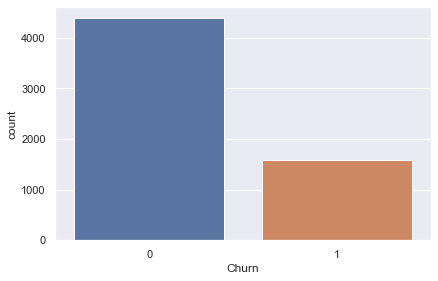

In [41]:
#Let's see weather our dataset is balanced or imbalanced
sns.countplot(data.Churn);

In [42]:
smote = SMOTE(random_state = 42)
x_smote, y_smote = smote.fit_resample(x,y)

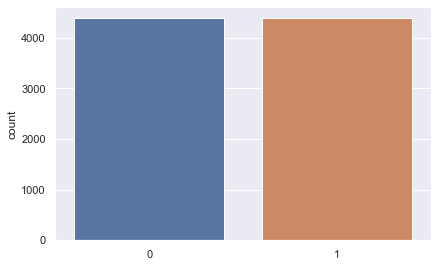

In [43]:
sns.countplot(y_smote);

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2 ,random_state = 42)

In [45]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [46]:
models = []
models.append(('Random Forest', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(("LightGBM", LGBMClassifier()))
models.append(('GBC',GradientBoostingClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('XGB', XGBClassifier()))
models.append(('SVC', SVC()))

In [47]:
model_names = []
scores = []

for name, model in models:
    score = cross_val_score(model, x_smote, y_smote, cv = 10, scoring = "accuracy")
    scores.append(score)
    model_names.append(name)
    print(f"Model name {name}, model scores: {score.mean()}")

Model name Random Forest, model scores: 0.8412081204562043
Model name KNN, model scores: 0.7650962460032779
Model name Decision Tree, model scores: 0.7839046708726946
Model name LightGBM, model scores: 0.840866954283473
Model name GBC, model scores: 0.831522871250354
Model name Logistic Regression, model scores: 0.8163722100866748
Model name XGB, model scores: 0.832091697986769
Model name SVC, model scores: 0.6552729459250967


### Logistic Regression

In [48]:
logreg = LogisticRegression(random_state = 42)
logreg_parameters = {"C": np.logspace(-3,3,7),
                    "penalty": ["l1", "l2"]}
gr = GridSearchCV(logreg, logreg_parameters, cv = 5, scoring = "accuracy", n_jobs = -1, verbose = 1)
model_logreg = gr.fit(x_train, y_train)
print("Logistic Regression Model Best Score", model_logreg.best_score_)
print("Logistic Regression Model Best Estimators", model_logreg.best_estimator_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    5.2s finished


Logistic Regression Model Best Score 0.8373706035627745
Logistic Regression Model Best Estimators LogisticRegression(C=100.0, random_state=42)


In [49]:
## Tuned model
logreg_tuned = model_logreg.best_estimator_
model = logreg_tuned.fit(x_train, y_train)
y_head_logreg_test = model.predict(x_test)
y_head_logreg_train = model.predict(x_train)
logreg_score_test = accuracy_score(y_test, y_head_logreg_test)
logreg_score_train = accuracy_score(y_train, y_head_logreg_train)

### XGB Classifier

In [50]:
xgb = XGBClassifier(random_state = 42)
xgb_parameters = {"learning_rate": [0.01, 0.03, 0.05],
                 "max_depth": [1,4,6],
                 "n_estimators": [100,300,400,600]}
gr = GridSearchCV(xgb, xgb_parameters, cv = 5, scoring = "accuracy", n_jobs = -1, verbose = 1)
model_xgb = gr.fit(x_train, y_train)
print("XGB Model Best Score", model_xgb.best_score_)
print("XGB Model Best Estimators", model_xgb.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.3min finished


XGB Model Best Score 0.8426387241333859
XGB Model Best Estimators XGBClassifier(learning_rate=0.05, max_depth=4, n_estimators=300,
              random_state=42)


In [51]:
## Tuned model
xgb_tuned = model_xgb.best_estimator_
model = xgb_tuned.fit(x_train, y_train)
y_head_xgb_test = model.predict(x_test)
y_head_xgb_train = model.predict(x_train)
xgb_score_train = accuracy_score(y_train, y_head_xgb_train)
xgb_score_test = accuracy_score(y_test, y_head_xgb_test)

### Random Forest

In [52]:
rf = RandomForestClassifier(random_state = 42)
rf_parameters = {"max_features":[1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf": [1,3,10],
                "bootstrap": [False],
                "n_estimators": [100,300],
                "criterion": ["gini"]}
gr = GridSearchCV(rf, rf_parameters, cv = 5, scoring = "accuracy", n_jobs = -1, verbose = 1)
model_rf = gr.fit(x_train, y_train)
print("Random Forest Model Best Score", model_rf.best_score_)
print("Random Forest Model Best Estimators", model_rf.best_estimator_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.3min finished


Random Forest Model Best Score 0.8417846316066957
Random Forest Model Best Estimators RandomForestClassifier(bootstrap=False, max_features=3, min_samples_split=10,
                       n_estimators=300, random_state=42)


In [53]:
# Tuned Model
rf_tuned = model_rf.best_estimator_
model = rf_tuned.fit(x_train, y_train)
y_head_rf_test = model.predict(x_test)
y_head_rf_train = model.predict(x_train)
rf_score_test = accuracy_score(y_test, y_head_rf_test)
rf_score_train = accuracy_score(y_train, y_head_rf_train)

### Gradient Boosting

In [54]:
gb = GradientBoostingClassifier(random_state = 42)
gb_parameters = {"learning_rate": [0.01, 0.03, 0.05, 0,1],
                 "max_depth": [1,4,6,8],
                 "n_estimators": [100,300,400,600,800]}
gr = GridSearchCV(gb, gb_parameters, cv = 5, scoring = "accuracy", n_jobs = -1, verbose = 1)
model_gb = gr.fit(x_train, y_train)
print("GB Model Best Score", model_gb.best_score_)
print("GB Model Best Estimators", model_gb.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.5min finished


GB Model Best Score 0.844347618902779
GB Model Best Estimators GradientBoostingClassifier(learning_rate=0.03, max_depth=8, n_estimators=600,
                           random_state=42)


In [55]:
# Tuned Model
gb_tuned = model_gb.best_estimator_
model = gb_tuned.fit(x_train, y_train)
y_head_gb_test = model.predict(x_test)
y_head_gb_train = model.predict(x_train)
gb_score_test = accuracy_score(y_test, y_head_gb_test)
gb_score_train = accuracy_score(y_train, y_head_gb_train)

### Decision Tree

In [56]:
dt = DecisionTreeClassifier(random_state = 42)
dt_parameters = {"min_samples_split":range(10,500,20),
                "max_depth":range(1,20,2)}
gr = GridSearchCV(dt, dt_parameters, cv = 5, n_jobs = -1, verbose = 1)
model_dt = gr.fit(x_train, y_train)
print("Decision Tree Model Best Score", model_dt.best_score_)
print("Decision Tree Model Best Estimators", model_dt.best_estimator_)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:    4.2s


Decision Tree Model Best Score 0.8197125650150561
Decision Tree Model Best Estimators DecisionTreeClassifier(max_depth=9, min_samples_split=130, random_state=42)


[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:    5.4s finished


In [57]:
# Tuned Model
dt_tuned = model_gb.best_estimator_
model = dt_tuned.fit(x_train, y_train)
y_head_dt_test = model.predict(x_test)
y_head_dt_train = model.predict(x_train)
dt_score_test = accuracy_score(y_test, y_head_dt_test)
dt_score_train = accuracy_score(y_train, y_head_dt_train)

### LightGBM

In [58]:
lgbm = LGBMClassifier(random_state = 42)
lgbm_parameters = {"learning_rate": [0.01, 0.03, 0.05, 0,1],
                 "max_depth": [1,4,6,8],
                 "n_estimators": [100,300,400,600,800]}
gr = GridSearchCV(lgbm, lgbm_parameters, cv = 5, n_jobs = -1, verbose = 1)
model_lgbm = gr.fit(x_train, y_train)
print("LGBM Model Best Score", model_lgbm.best_score_)
print("LGBM Model Best Estimators", model_lgbm.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 477 out of 500 | elapsed:   37.2s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   39.6s finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
LGBM Model Best Score 0.8436368890105544
LGBM Model Best Estimators LGBMClassifier(learning_rate=0.01, max_depth=8, n_estimators=800,
               random_state=42)


In [59]:
# Tuned Model
lgbm_tuned = model_lgbm.best_estimator_
model = lgbm_tuned.fit(x_train, y_train)
y_head_lgbm_test = model.predict(x_test)
y_head_lgbm_train = model.predict(x_train)
lgbm_score_test = accuracy_score(y_test, y_head_lgbm_test)
lgbm_score_train = accuracy_score(y_train, y_head_lgbm_train)

### KNN

In [60]:
knn = KNeighborsClassifier()
knn_parameters = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
gr = GridSearchCV(knn, knn_parameters, cv = 5, n_jobs = -1, verbose = 1)
model_knn = gr.fit(x_train, y_train)
print("KNN Model Best Score", model_knn.best_score_)
print("KNN Model Best Estimators", model_knn.best_estimator_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   14.1s


KNN Model Best Score 0.8094576755786719
KNN Model Best Estimators KNeighborsClassifier(metric='euclidean', n_neighbors=13)


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   15.7s finished


In [61]:
# Tuned Model
knn_tuned = model_knn.best_estimator_
model = knn_tuned.fit(x_train, y_train)
y_head_knn_test = model.predict(x_test)
y_head_knn_train = model.predict(x_train)
knn_score_test = accuracy_score(y_test, y_head_knn_test)
knn_score_train = accuracy_score(y_train, y_head_knn_train)

## Model Evaluation

In [62]:
print("Logistic Regression results : \n")
print("Accuracy score of train data", logreg_score_train)
print("Accuracy score of test data", logreg_score_test)
print("---------------------------------------------------------------")

print("XGB results : \n")
print("Accuracy score of train data", xgb_score_train)
print("Accuracy score of test data", xgb_score_test)
print("---------------------------------------------------------------")

print("Random Forest results : \n")
print("Accuracy score of train data", rf_score_train)
print("Accuracy score of test data", rf_score_test)
print("---------------------------------------------------------------")

print("Gradient Boosting results : \n")
print("Accuracy score of train data", gb_score_train)
print("Accuracy score of test data", gb_score_test)
print("---------------------------------------------------------------")

print("Decision Tree results : \n")
print("Accuracy score of train data", dt_score_train)
print("Accuracy score of test data", dt_score_test)
print("---------------------------------------------------------------")

print("LightGBM results : \n")
print("Accuracy score of train data", lgbm_score_train)
print("Accuracy score of test data", lgbm_score_test)
print("---------------------------------------------------------------")

print("KNN results : \n")
print("Accuracy score of train data", knn_score_train)
print("Accuracy score of test data", knn_score_test)
print("---------------------------------------------------------------")

Logistic Regression results : 

Accuracy score of train data 0.8396468242665908
Accuracy score of test data 0.8234624145785877
---------------------------------------------------------------
XGB results : 

Accuracy score of train data 0.8778125890059812
Accuracy score of test data 0.8325740318906606
---------------------------------------------------------------
Random Forest results : 

Accuracy score of train data 0.9612645969809172
Accuracy score of test data 0.8365603644646925
---------------------------------------------------------------
Gradient Boosting results : 

Accuracy score of train data 0.9951580746226146
Accuracy score of test data 0.8394077448747153
---------------------------------------------------------------
Decision Tree results : 

Accuracy score of train data 0.9951580746226146
Accuracy score of test data 0.8394077448747153
---------------------------------------------------------------
LightGBM results : 

Accuracy score of train data 0.89062945029906
Accuracy